In [1]:
import sys 
from    StaccatoLab import *
import  numpy as np
import  matplotlib.pyplot  as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
version()

'StaccatoLab: version alpha.11'

# Minor Assignment *LM-loop*

Given graph `G` below. Note that all nodes have *multi-rate* firing behavior, specified by lists `M` and `L`: 
`M` tokens in; `L` tokens out. Convince yourself that the graph produced by `G.plot_graph()` corresponds with the Python program. This includes paying attention to the initial capacities of the edges.

1. What is the topology matrix of `G`? (Format is free: table, Latex matrix, structured list, as long as the row-column structure is clear.)
2. Solve the balance equation. What is firing vector `r`?
3. Simulate `G` for different `e[3]` initializations: `D=0` to `D=5`. Ensure that there are no initial tokens on the other edges. Depending on the value chosen for `D`, periodic behavior may or may not arise. In case there is no periodic behavior, explain why. In case there is, mention the observed `P` and argue whether or not it is minimal.
4. For those initializations considered in item 3 that resulted in periodic behavior, compute a vector `tc` of 4 values, where value `tc[i]` represents the number of tokens produced per iteration period by node `n[i]`. Hint: Either the edge analysis method `E.flow(tmin=0, tmax=0)` or methods for its visualization `G.plot_flow()` and/or `G.print_flow()` (see examples below) can be used to answer this question.
5. How can these counts be computed from balance equation?

Grading for the 5 questions: [2, 2, 2, 2, 2]

GLM (Graph)       : no errors (flow-only graph)


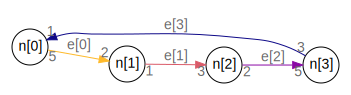

In [2]:
M, L  = [1, 2, 3, 5],  [5, 1, 2, 3]             

GLM   = Graph()
G     = GLM
G.n   = [LM(M=M[i], L=L[i]) for i in range(len(M))]
G.e   = Path(G.n, G.n[0])
G.e[2].init(D=6)
G.build()
G.plot_graph()

We first copy the graph given by a new function for later use.

In [3]:
def get_origin_graph():
    M, L  = [1, 2, 3, 5],  [5, 1, 2, 3]             
    GLM   = Graph()
    G     = GLM
    G.n   = [LM(M=M[i], L=L[i]) for i in range(len(M))]
    G.e   = Path(G.n, G.n[0])
    G.e[2].init(D=6)
    return G

Then we can plot the graph again to have a check.

GLM (Graph)       : no errors (flow-only graph)


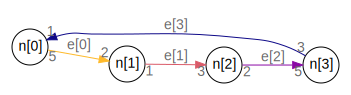

In [4]:
GLM = get_origin_graph()
GLM.build()
GLM.plot_graph()

It is obvious that we get the same graph. Now we can start this assignment.

## Question 1

Let $\Gamma_{GLM}$ denote the *topology matrix* of graph `GLM`. According to `GLM`, we have:

$$
\Gamma_{GLM} = 
\begin{vmatrix}
     5 & -2 &  0 &  0 \\
     0 &  1 & -3 &  0 \\
     0 &  0 &  2 & -5 \\
    -1 &  0 &  0 &  3 \\
\end{vmatrix}
$$

## Question 2

Let $r$ denote the *firing vector* $(q_{n[0]}, q_{n[1]}, q_{n[2]}, q_{n[3]})^T$. The balance equation is

$$
\Gamma_{GLM} \cdot r = \vec{0}
$$

In [5]:
topology_matrix = np.array([
    [5, -2, 0, 0],
    [0, 1, -3, 0], 
    [0, 0, 2, -5],
    [-1, 0, 0, 3]
])

print('The rank of the topology matrix is', np.linalg.matrix_rank(topology_matrix))

The rank of the topology matrix is 3


The rank of $\Gamma_{GLM}$ is 3, which is less than $\min(r, c)=4$, where $r$ and $c$ are the number of rows and columns of $\Gamma_{GLM}$. This illustrates that the balance equation has **non-trivial** solution. Therefore, the firing vector $r$ is

$$
r = k*(6, 15, 5, 2)^T
$$

where $k \in N$ (including zero vector). It means that $\Gamma_{GLM}$ has *periodic schedule*, i.e. is *consistent*.

## Question 3

We should first get the graph without any initial tokens by the following function:

In [6]:
def get_graph_notoken():
    M, L  = [1, 2, 3, 5],  [5, 1, 2, 3]             
    GLM   = Graph()
    G     = GLM
    G.n   = [LM(M=M[i], L=L[i]) for i in range(len(M))]
    G.e   = Path(G.n, G.n[0])
    return G

Then we can simulate $G$ with different initialization of `e[3]` by following code:

In [7]:
for initial_D in range(0, 6):
    G_Q3 = get_graph_notoken()
    G_Q3.e[3].init(D=initial_D)
    G_Q3.build()
    print('The simulation result when the initial number of tokens assigned to e[3] is', initial_D)
    G_Q3.view(sim=True)
    del G_Q3

G_Q3 (Graph)      : no errors (flow-only graph)
The simulation result when the initial number of tokens assigned to e[3] is 0


Output()

G_Q3 (Graph)      : no errors (flow-only graph)
The simulation result when the initial number of tokens assigned to e[3] is 1


Output()

G_Q3 (Graph)      : no errors (flow-only graph)
The simulation result when the initial number of tokens assigned to e[3] is 2


Output()

G_Q3 (Graph)      : no errors (flow-only graph)
The simulation result when the initial number of tokens assigned to e[3] is 3


Output()

G_Q3 (Graph)      : no errors (flow-only graph)
The simulation result when the initial number of tokens assigned to e[3] is 4


Output()

G_Q3 (Graph)      : no errors (flow-only graph)
The simulation result when the initial number of tokens assigned to e[3] is 5


Output()

From the lecture we know that consistency is not a sufficient condition for absence of deadlock. Therefore, under different initialization, we get different results:

- When `D=0`, deadlock occurs at `cycle=1`. Because there is no initial tokens on each edge, making no nodes can fire because there are no enough tokens on every input edges for all nodes. `P` does not exist in this case.
- When `D=1`, deadlock occurs at `cycle=6`. At this moment, there are 1 and 2 tokens on `e[0]` and `e[1]` respectively, and no tokens on other edges. So the possibile nodes that can fire is `n[1]` and `n[2]`. But these two nodes need 2 and 3 tokens to fire, which are all higher than the numbers of existing tokens (2>1, 3>2). So nothing will happen afterwards, i.e. deadlock. `P` does not exist in this case.
- When `D=2`, deadlock occurs at `cycle=12`. At this moment, there are 2 tokens on both `e[1]` and `e[2]` and no tokens on other edges. So the possibile nodes that can fire is `n[2]` and `n[3]`. But these two nodes need 3 and 5 tokens to fire, which are all higher than the numbers of existing tokens (3>2, 5>2). So nothing will happen afterwards, i.e. deadlock. `P` does not exist in this case.
- When `D=3`, deadlock occurs at `cycle=16`. At this moment, there are 1, 1 and 4 tokens on `e[0]`, `e[1]` and `e[2]` respectively, and no tokens on other edges. So the possibile nodes that can fire is `n[1]`, `n[2]` and `n[3]`. But these three nodes need 2, 3 and 5 tokens to fire, which are all higher than the numbers of existing tokens (2>1, 3>1, 5>4). So nothing will happen afterwards, i.e. deadlock. `P` does not exist in this case.

When `D>3`, there will be periodic behaviors. We can find out the period $P$ from the `lasso` output. For example, when `D=4`, we get `lasso=6(31)*`, indicating that the graph has a periodic schedule of length 31 after 6 cycles. So in this case, $P=31$. Hence,

- When `D=4`, from `lasso=6(31)*`, we have $P=31$ in this case.
- When `D=5`, from `lasso=6(30)*`, we have $P=30$ in this case.

Apparently, `P=31` is not minimal, since when `D=5`, `P=30`. From the firing vector $r = k*(6, 15, 5, 2)^T, k \in N$, we know that the **least common multiple (LCM)** of the least *non-trivial* firing times (6, 15, 5, 2) is 30. Therefore, the minimum period is 30. So when `D=5`, `P=30` is minimal.

## Question 4

In this question, we need to discuss two cases: `D=4` and `D=5`.

### `D=4`

In this case, we first re-build the graph and simulate 60 cycles, which is enough long for `lasso=6(31)*`.

G_Q4_D4 (Graph)   : no errors (flow-only graph)
 #cycles real time  cpu time   #events  6(31)*  rate=1.000 Hz
      60     60.0s      0.0s       113  lasso=6(31)*
      60     60.0s      0.0s       113  pause


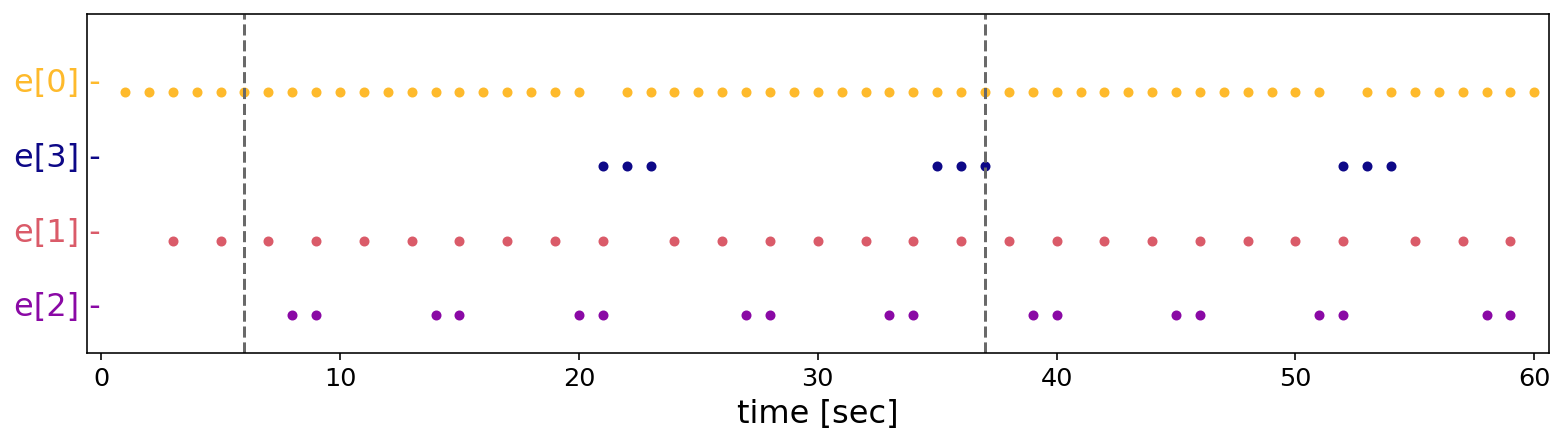

In [8]:
G_Q4_D4 = get_graph_notoken()
G_Q4_D4.e[3].init(D=4)
G_Q4_D4.build()
G_Q4_D4.sim(T=60)
G_Q4_D4.plot_flow(markersize=8);

From [StaccatoLab-Reference.8.pdf, Page 21], we know that `E.flow(tmin, tmax)` is a method that returns a list of the production times (in seconds) of the tokens produced on `E`. The length of the returned list is the number of tokens generated on `E` within period `[tmin, tmax]`. And in this paticular graph, tokens on `e[i]` are all generated from `n[i]` for $0 \le i \le 3$. So `tc[i]` is equal to $e[i].flow()$ within an iteration period. Thus we can use the following function to calculate `tc` for this graph.

In [9]:
def cal_tc(G, _tmin, _tmax):
    tc = []
    for i in range(len(G.e)):
        tc.append(len(G.e[i].flow(tmin=_tmin, tmax=_tmax)))
    return tc

From the simulation above, we can observe that from `cycle=6` to `cycle=37` is an iteration period. Therefore, we set `tmin=6+1=7` and `tmax=37`. So we have:

In [10]:
cal_tc(G_Q4_D4, 7, 37)

[30, 15, 10, 6]

Hence, for `D=4`, `tc=[30, 15, 10, 6]`.

### `D=5`

Using the same method, we first re-build the graph and find out an iteration period.

G_Q4_D5 (Graph)   : no errors (flow-only graph)
 #cycles real time  cpu time   #events  6(30)*  rate=1.000 Hz
      60     60.0s      0.0s       116  lasso=6(30)*
      60     60.0s      0.0s       116  pause


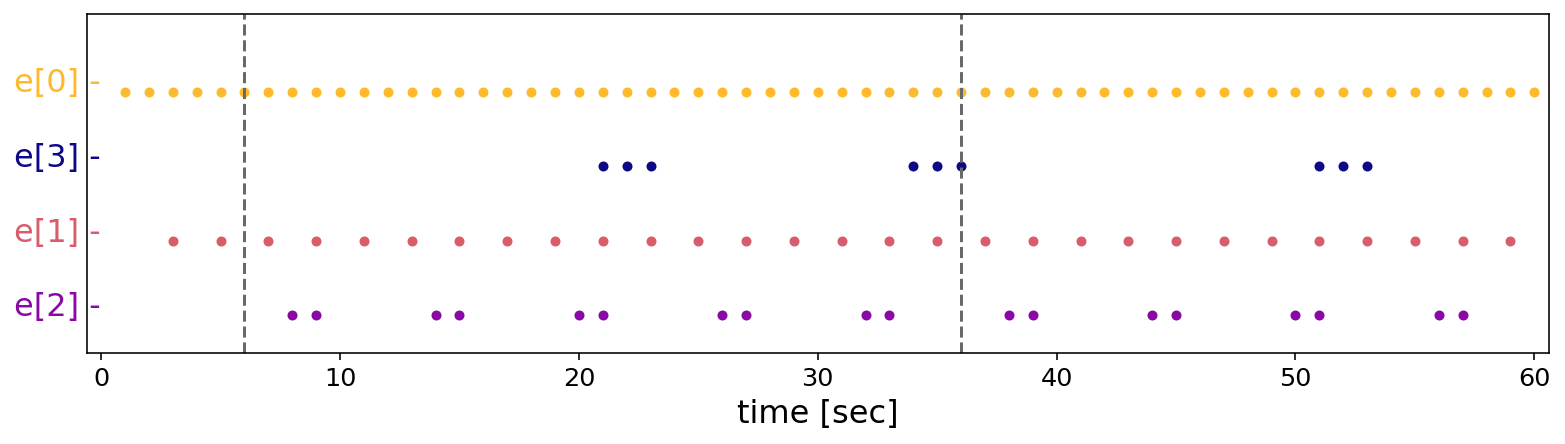

In [11]:
G_Q4_D5 = get_graph_notoken()
G_Q4_D5.e[3].init(D=5)
G_Q4_D5.build()
G_Q4_D5.sim(T=60)
G_Q4_D5.plot_flow(markersize=8);

From the simulation above, we can observe that from `cycle=6` to `cycle=36` is an iteration period. Therefore, we set `tmin=6+1=7` and `tmax=36`. So we have:

In [12]:
cal_tc(G_Q4_D5, 7, 36)

[30, 15, 10, 6]

Hence, for `D=5`, `tc=[30, 15, 10, 6]`. For both cases, the results are the same, so we can conclude that `tc=[30, 15, 10, 6]`.

## Question 5

The vector `tc` can be calculated by the *Hadamard product* (a.k.a. *element-wise product*) [[1]](#1) of the transpose of the *minimal non-trvial* firing vector and the *diagonal vector* of $\Gamma_{GLM}$. Concretely,

$$
tc = r^\star \odot diag\_vec\ (\Gamma_{GLM})
$$

where $r^\star = r^T$ when $k=1$, $diag\_vec\ (\Gamma_{GLM})$ returns the diagonal vector of matrix $\Gamma_{GLM}$, and $\odot$ denotes the Hadamard product operator. In this particular case, $r^\star = [6, 15, 5, 2]$, and $diag\_vec\ (\Gamma_{GLM}) = [5, 1, 2, 3]$, the element-wise product is $[30, 15, 10, 6]$, which is exactly the result in Question 4. We can check using the following code.

In [13]:
r_star = np.array([6, 15, 5, 2])
tc = r_star * np.diagonal(topology_matrix)
tc

array([30, 15, 10,  6])

## Bibliography

<a id="1">[1]</a> Horn, Roger A.; Johnson, Charles R. (2012). *Matrix analysis*. Cambridge University Press.